In [1]:
import pandas as pd 
df =pd.read_csv("BankChurners.csv")  # attrition_flag 계정 상태    마지막 2열은 삭제 / month on book 은행과 거래기간 
df
"""
Total no. of products held by the customer : 총 은행 거래 상품
No. of months inactive in the last 12 months : 근 12개월동안 비활성화된 월수 
No. of Contacts in the last 12 months : 최근 12개월 연결된 월수 
Credit Limit on the Credit Card : 카드 한도 
Total Revolving Balance on the Credit Card : 리볼빙 잔액 
Open to Buy Credit Line (Average of last 12 months) : 신용 한도 구매 가능(지난 12개월 평균)
Change in Transaction Amount (Q4 over Q1) : 거래 금액 변도 1분기대비 4분기 
Total Transaction Amount (Last 12 months) : 총 거래 금액 
Total Transaction Count (Last 12 months)  : 총 거래 횟수
Change in Transaction Count (Q4 over Q1) : 거래획수 변화 1분기 대비 4분기
Average Card Utilization Ratio : 카드 평균 이용률"""

df.shape

(10127, 23)

In [2]:
!pip install category encoders

# 타겟을 잘 설명할 수 있는 특성은 어떤 것일까 ? 
## 데이터 인코딩 ,  필요없는 특성 삭제 , 특성 공학 

In [3]:
# tail tow columns remove 
df = df.iloc[:, : -2]

In [4]:
df.info()
# 범주형 변수 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
df.dtypes
#Q. 여러분들이 프로젝트에 사용할 데이터셋과 타겟특성에 대해 아래의 내용을 포함하여 간략하게 설명해주세요.

#df.dtype을 사용해서 타겟특성의 데이터 타입 확인
#df.describe를 사용해서 타겟특성의 대표값 확인(실수-평균, 범주형-최빈값) 
# 타겟 : attrition_flag 
df.Attrition_Flag.dtype # dtype('O') 
df.Attrition_Flag.mode() # {0 :  Existing Customer}

df.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
df.Attrition_Flag.value_counts(normalize= True) # 불균형 타겟 

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [8]:
import sklearn 
sklearn.__version__  

'1.1.1'

In [9]:
!pip install scikit-learn --user --upgrade  # 0점대에서 1점대 버전으로 업데이트 

In [10]:
import matplotlib.pyplot as plt 

dataset =  pd.read_csv("/Users/tjrksp/Downloads/PythonMLWorkspace(LightWeight)/ScikitLearn/LinearRegressionData.csv")

X = dataset.iloc[: , : -1]
y = dataset.iloc[:, -1]


Bad key text.latex.preview in file /Users/tjrksp/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/tjrksp/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/tjrksp/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the

In [11]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X,y)


LinearRegression()

In [12]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

In [13]:
reg.predict([[9],[1],[6]])  # 2차원 배열  !! 

/Users/tjrksp/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93.77478776, 10.22521224, 62.44369694])

In [14]:
reg.coef_  # 기울기 


array([10.44369694])

In [15]:
reg.intercept_ # 절편 

-0.21848470286721522

In [16]:
x = 9 
y = 10.44* x -0.21
y

93.75

In [17]:
reg.score(X,y_pred)

1.0

In [18]:
"""
Total no. of products held by the customer : 총 은행 거래 상품
No. of months inactive in the last 12 months : 근 12개월동안 비활성화된 월수 
No. of Contacts in the last 12 months : 최근 12개월 연결된 월수 
Credit Limit on the Credit Card : 카드 한도 
Total Revolving Balance on the Credit Card : 리볼빙 잔액 
Open to Buy Credit Line (Average of last 12 months) : 신용 한도 구매 가능(지난 12개월 평균)
Change in Transaction Amount (Q4 over Q1) : 거래 금액 변도 1분기대비 4분기 
Total Transaction Amount (Last 12 months) : 총 거래 금액 
Total Transaction Count (Last 12 months)  : 총 거래 횟수
Change in Transaction Count (Q4 over Q1) : 거래획수 변화 1분기 대비 4분기
Average Card Utilization Ratio : 카드 평균 이용률"""

'\nTotal no. of products held by the customer : 총 은행 거래 상품\nNo. of months inactive in the last 12 months : 근 12개월동안 비활성화된 월수 \nNo. of Contacts in the last 12 months : 최근 12개월 연결된 월수 \nCredit Limit on the Credit Card : 카드 한도 \nTotal Revolving Balance on the Credit Card : 리볼빙 잔액 \nOpen to Buy Credit Line (Average of last 12 months) : 신용 한도 구매 가능(지난 12개월 평균)\nChange in Transaction Amount (Q4 over Q1) : 거래 금액 변도 1분기대비 4분기 \nTotal Transaction Amount (Last 12 months) : 총 거래 금액 \nTotal Transaction Count (Last 12 months)  : 총 거래 횟수\nChange in Transaction Count (Q4 over Q1) : 거래획수 변화 1분기 대비 4분기\nAverage Card Utilization Ratio : 카드 평균 이용률'

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [20]:
df.sample(5) # clent num 삭제/
# attrition_frag = target  .. 0,1 변경 
# 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10017,797228883,Existing Customer,46,M,2,High School,Married,$40K - $60K,Blue,40,...,3,0,3981.0,0,3981.0,0.626,14340,114,0.781,0.000
8886,771752508,Existing Customer,40,F,3,Doctorate,Married,Less than $40K,Blue,29,...,1,1,4660.0,1844,2816.0,1.018,8571,84,0.647,0.396
6845,708453408,Existing Customer,40,M,4,College,Divorced,$80K - $120K,Blue,31,...,2,3,16050.0,0,16050.0,0.770,3721,62,0.512,0.000
5215,711468708,Attrited Customer,38,F,4,High School,Single,$40K - $60K,Blue,31,...,3,2,1438.3,0,1438.3,0.406,1986,52,0.486,0.000
7325,717343833,Existing Customer,47,F,5,Uneducated,Unknown,Unknown,Blue,34,...,1,3,3127.0,2094,1033.0,0.709,4518,86,0.830,0.670


<AxesSubplot:ylabel='Frequency'>

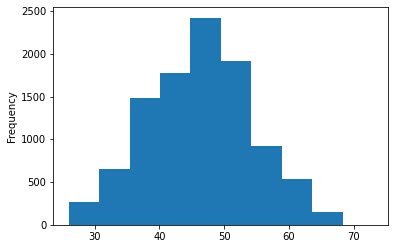

In [21]:
df["Customer_Age"].plot(kind = "hist")

In [22]:
df["Customer_Age"].describe()  # 26 ~ 73 
df["Gender"].unique()  # m,f 
df["Dependent_count"].describe()  # 0~ 5 
df["Education_Level"].unique() # HIGH SCHOOL , GRADUATE 대학졸업생 , Uneducated 무학력 , unknown , college 단과 대학 , 
# Post-Graduate 대학원생  ,Doctorate 박사학위 

df["Education_Level"].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [23]:
df["Marital_Status"].unique()   # married , single , unknownm,  divorced (4)
df["Marital_Status"].value_counts()



Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [24]:
df["Income_Category"].unique() # 60~ 80 , ~40 , 80 ~120 , 40 ~60 , 120~ , unk (6)
df["Income_Category"].value_counts()


Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

<AxesSubplot:ylabel='Frequency'>

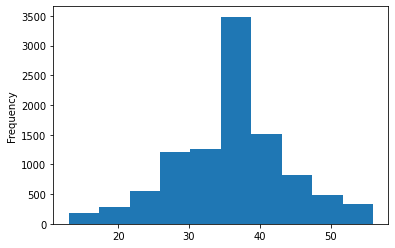

In [25]:
df["Months_on_book"].plot(kind = "hist")

<AxesSubplot:ylabel='Frequency'>

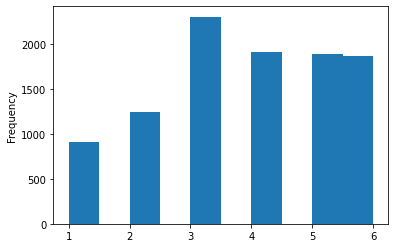

In [26]:
df["Total_Relationship_Count"].plot(kind = "hist")

<AxesSubplot:ylabel='Frequency'>

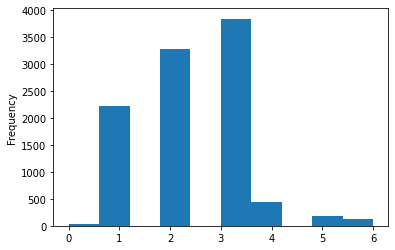

In [27]:
df["Months_Inactive_12_mon"].plot(kind = "hist")

<AxesSubplot:ylabel='Frequency'>

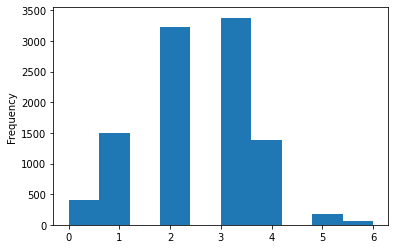

In [28]:

df["Contacts_Count_12_mon"].plot(kind = "hist")

<AxesSubplot:ylabel='Frequency'>

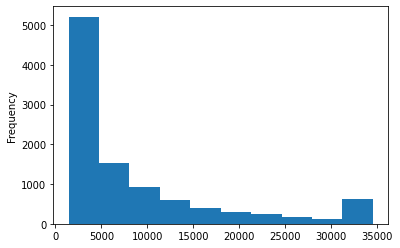

In [29]:

df["Credit_Limit"].plot(kind = "hist")

count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64

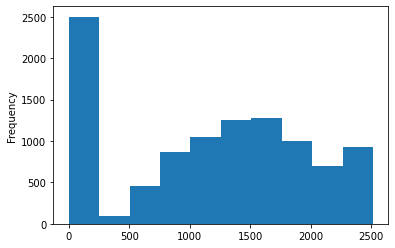

In [30]:

df["Total_Revolving_Bal"].plot(kind = "hist")
df["Total_Revolving_Bal"].describe()

<AxesSubplot:ylabel='Frequency'>

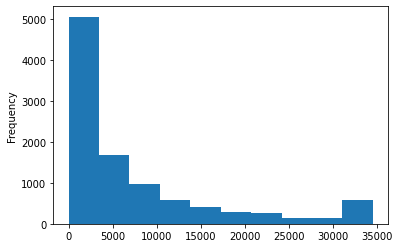

In [31]:

df["Avg_Open_To_Buy"].plot(kind = "hist") # 신용거래로 12개월 평균 거래량 ? 

<AxesSubplot:ylabel='Frequency'>

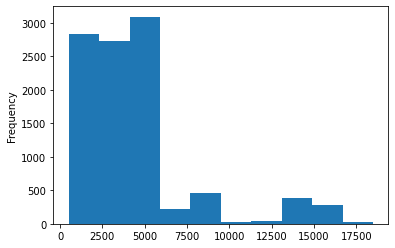

In [32]:

df["Total_Trans_Amt"].plot(kind = "hist")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [34]:
df.corr(method='pearson')

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


<AxesSubplot:>

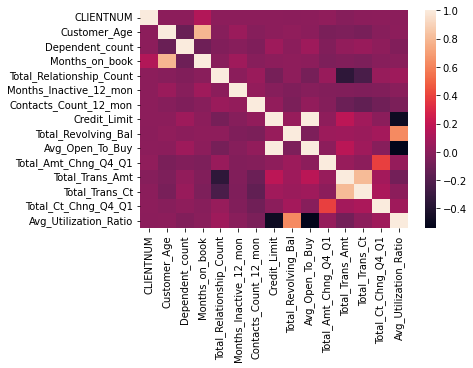

In [35]:
import seaborn as sns 
sns.heatmap(df.corr(method='pearson'))



In [36]:
from category_encoders import OrdinalEncoder
enc = OrdinalEncoder(cols = ["Attrition_Flag"])
encoded = enc.fit(df)

df = encoded.transform(df)
df.Attrition_Flag.unique()



array([1, 2])

<AxesSubplot:>

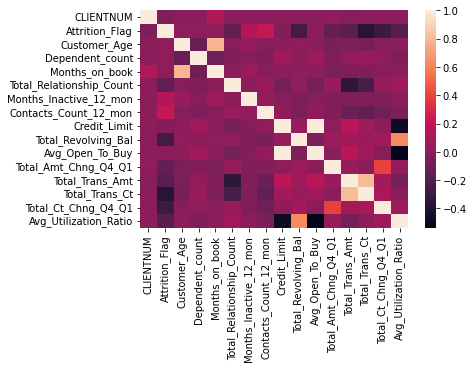

In [37]:
import seaborn as sns 
sns.heatmap(df.corr(method='pearson'))

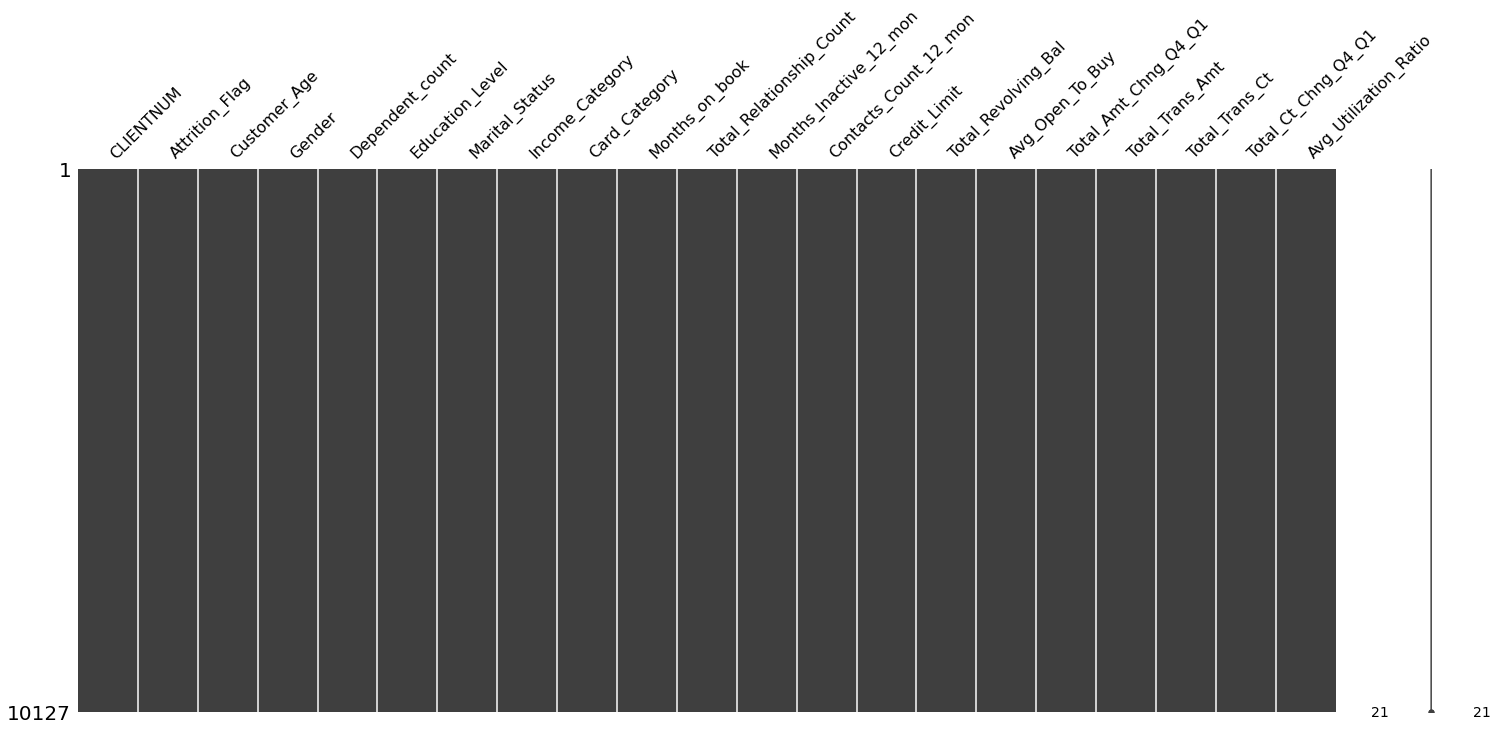

<Figure size 1080x648 with 0 Axes>

In [38]:
import missingno as msno
import matplotlib.pyplot as plt 
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

In [39]:
y_train = df["Attrition_Flag"]


In [40]:
X_train = df.iloc[:,2:]
X_train

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [41]:
!pip install imbalanced-learn

In [42]:
# from imblearn.over_sampling import SMOTE

In [43]:
# sm = SMOTE(sampling_strategy='auto', random_state=3)
# x_sm, y_sm = sm.fit_resample(X_train, y_train)

# oversample = RandomOverSampler(sampling_strategy='minority')
# X_over, y_over = oversample.fit_resample(X, y)
# print(Counter(y_over))
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


# pipe = make_pipeline( 
#     RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=False)
# )

# pipe.fit(X_train, y_train)
# print('검증 정확도: ', pipe.score(X_val, y_val))

In [44]:

import numpy as np
from sklearn.preprocessing import LabelEncoder 

label_enc = LabelEncoder()
encoded = label_enc.fit_transform(df["Attrition_Flag"])
a,b = np.unique(encoded, return_counts =True)

In [45]:

np.column_stack((a,b))

array([[   0, 8500],
       [   1, 1627]])

In [46]:
df["Attrition_Flag"] = encoded
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [47]:
df[df["Education_Level"] == "Unknown"]["Attrition_Flag"].value_counts()

0    1263
1     256
Name: Attrition_Flag, dtype: int64

In [48]:
df[df["Marital_Status"] == "Unknown"]["Attrition_Flag"].value_counts()

0    620
1    129
Name: Attrition_Flag, dtype: int64

In [49]:
df[df["Income_Category"] == "Unknown"]["Attrition_Flag"].value_counts()

0    925
1    187
Name: Attrition_Flag, dtype: int64

In [50]:
remove = df[(df["Education_Level"] =="Unknown") | (df["Marital_Status"] == "Unknown")| (df["Income_Category"] == "Unknown" )].index

In [51]:
df.drop(remove, axis = 0 , inplace = True)#10127

In [52]:
df # unknown 싹 삭제 
df.Attrition_Flag.value_counts(normalize =True)

0    0.842819
1    0.157181
Name: Attrition_Flag, dtype: float64

In [53]:
df.info() # 인코딩 : gender ,  education Level , marital , income , card cate
df = df.iloc[:, 1:]
df.reset_index(drop = True, inplace = True)
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 7081 non-null   int64  
 1   Attrition_Flag            7081 non-null   int64  
 2   Customer_Age              7081 non-null   int64  
 3   Gender                    7081 non-null   object 
 4   Dependent_count           7081 non-null   int64  
 5   Education_Level           7081 non-null   object 
 6   Marital_Status            7081 non-null   object 
 7   Income_Category           7081 non-null   object 
 8   Card_Category             7081 non-null   object 
 9   Months_on_book            7081 non-null   int64  
 10  Total_Relationship_Count  7081 non-null   int64  
 11  Months_Inactive_12_mon    7081 non-null   int64  
 12  Contacts_Count_12_mon     7081 non-null   int64  
 13  Credit_Limit              7081 non-null   float64
 14  Total_R

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
4,0,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,0,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
7077,0,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
7078,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
7079,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [54]:
df # 성별 , 결혼상태  순서 x (원핫인코딩, 타겟인토딩 ), 학업수준, 소득수준 순서 0  (ordinal mapping )

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
4,0,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,0,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
7077,0,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
7078,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
7079,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


# 타겟을 잘 설명할 특성은 ? 


In [55]:
d = df[df["Attrition_Flag"]== 1]
d

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
12,1,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
31,1,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
33,1,56,M,2,Graduate,Married,$120K +,Blue,36,1,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
37,1,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000
89,1,53,M,2,Graduate,Married,$80K - $120K,Blue,41,3,3,2,11669.0,2227,9442.0,0.622,720,23,0.353,0.191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7066,1,47,M,4,Graduate,Divorced,$80K - $120K,Blue,39,4,3,4,17504.0,476,17028.0,0.892,10468,66,0.737,0.027
7070,1,33,M,2,College,Married,$120K +,Gold,20,2,1,4,34516.0,0,34516.0,1.004,9338,73,0.622,0.000
7071,1,27,M,0,High School,Divorced,$60K - $80K,Blue,36,2,3,2,13303.0,2517,10786.0,0.929,10219,85,0.809,0.189
7079,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


<AxesSubplot:xlabel='Gender'>

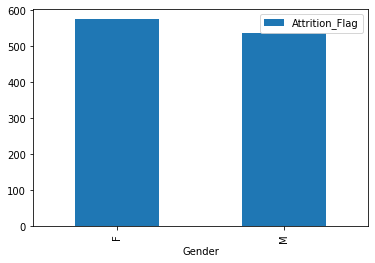

In [56]:
gdf =d.groupby(["Gender"]).sum().reset_index()
# gdf.plot().bar(x= "Gender", y = "Attrition_Flag")

gdf.iloc[:, :2].plot.bar(x= "Gender",y = "Attrition_Flag")
# 탈퇴회원 남녀 비율 비슷 

<AxesSubplot:ylabel='Frequency'>

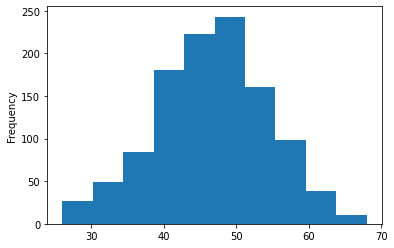

In [57]:
d.Customer_Age.plot(kind = "hist")  # 전체 카드 회원 비율과 비슷 


<AxesSubplot:ylabel='Frequency'>

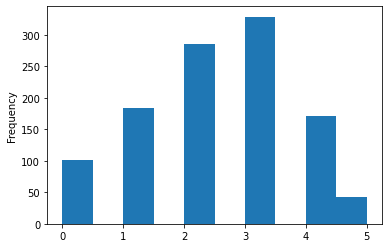

In [58]:
d.Dependent_count.plot(kind = "hist")   # 부양가족수 비율 비슷 

<AxesSubplot:ylabel='Frequency'>

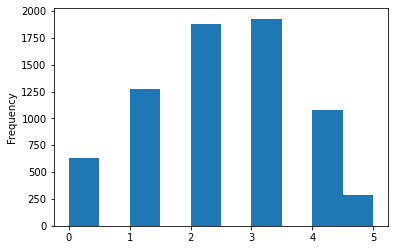

In [59]:
df.Dependent_count.plot(kind = "hist") 

Attrition_Flag                 1113.000
Customer_Age                  51766.000
Dependent_count                2640.000
Months_on_book                40238.000
Total_Relationship_Count       3671.000
Months_Inactive_12_mon         2999.000
Contacts_Count_12_mon          3284.000
Credit_Limit                9080499.500
Total_Revolving_Bal          743878.000
Avg_Open_To_Buy             8336621.500
Total_Amt_Chng_Q4_Q1            770.219
Total_Trans_Amt             3457308.000
Total_Trans_Ct                49871.000
Total_Ct_Chng_Q4_Q1             619.387
Avg_Utilization_Ratio           182.055
dtype: float64


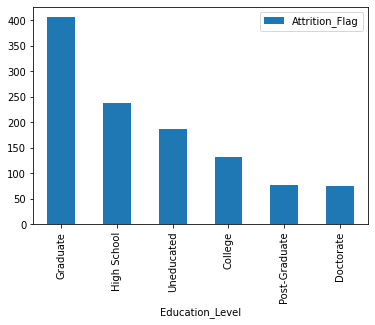

In [60]:
gdf =d.groupby(["Education_Level"]).sum().reset_index()
# gdf.plot().bar(x= "Gender", y = "Attrition_Flag")
gdf =gdf.sort_values(by='Attrition_Flag', ascending = False)
gdf.iloc[:, :].plot.bar(x= "Education_Level",y = "Attrition_Flag")
print(d.groupby(["Education_Level"]).sum().sum())

<AxesSubplot:xlabel='index'>

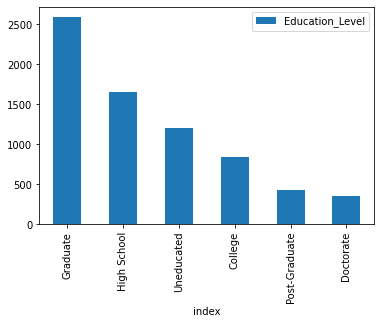

In [61]:
df1 =df.groupby(["Education_Level"]).sum()
df.Education_Level.value_counts().reset_index().plot.bar(x= "index",y = "Education_Level")



<AxesSubplot:xlabel='index'>

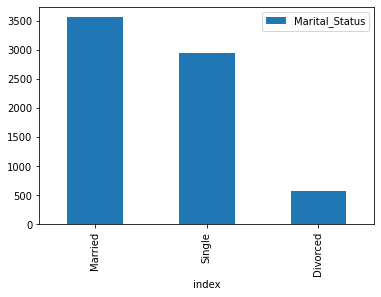

In [62]:
#전체 결혼 비율 

df.Marital_Status.value_counts().reset_index().plot.bar(x= "index",y = "Marital_Status")


<AxesSubplot:xlabel='index'>

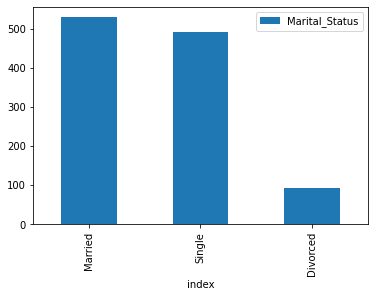

In [63]:

d.Marital_Status.value_counts().reset_index().plot.bar(x= "index",y = "Marital_Status")


<AxesSubplot:xlabel='index'>

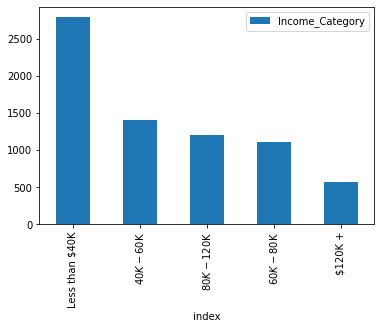

In [64]:

df.Income_Category.value_counts().reset_index().plot.bar(x= "index",y = "Income_Category")


<AxesSubplot:xlabel='index'>

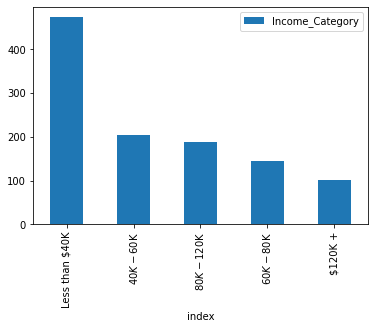

In [65]:
d.Income_Category.value_counts().reset_index().plot.bar(x= "index",y = "Income_Category")

<AxesSubplot:xlabel='index'>

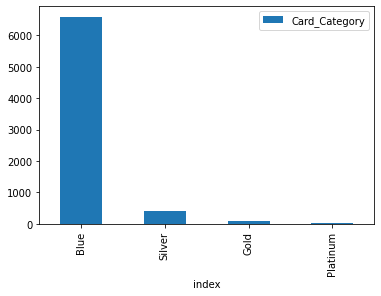

In [66]:
df.Card_Category.value_counts().reset_index().plot.bar(x= "index",y = "Card_Category")

<AxesSubplot:xlabel='index'>

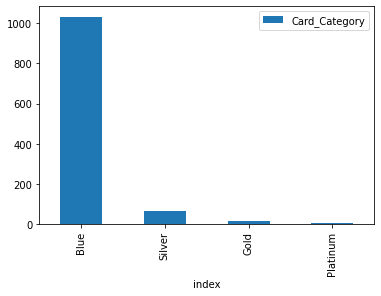

In [67]:

d.Card_Category.value_counts().reset_index().plot.bar(x= "index",y = "Card_Category")

<AxesSubplot:ylabel='Frequency'>

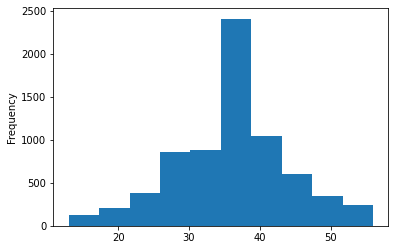

In [68]:
df.Months_on_book.plot(kind= "hist")

<AxesSubplot:ylabel='Frequency'>

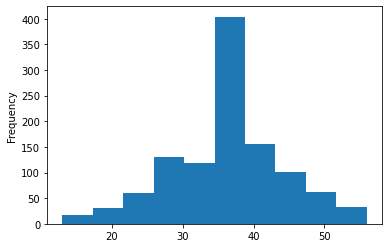

In [69]:
d.Months_on_book.plot(kind= "hist")

<AxesSubplot:ylabel='Frequency'>

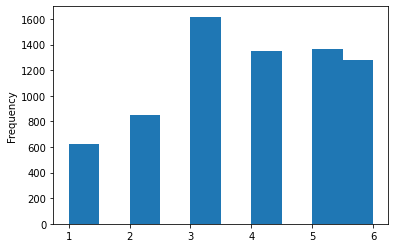

In [70]:


df.Total_Relationship_Count.plot(kind= "hist") #제품수가 많으면 탈퇴 가능성이 적어진다. 

<AxesSubplot:ylabel='Frequency'>

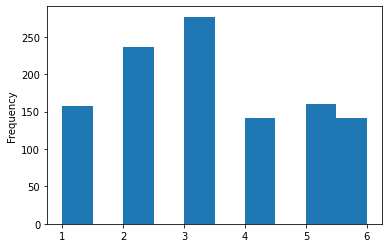

In [71]:

d.Total_Relationship_Count.plot(kind= "hist")

<AxesSubplot:ylabel='Frequency'>

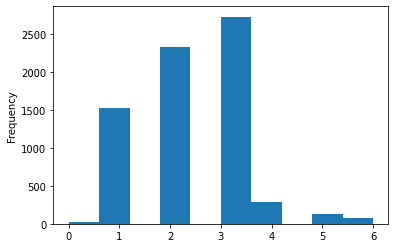

In [72]:



df.Months_Inactive_12_mon.plot(kind= "hist")

<AxesSubplot:ylabel='Frequency'>

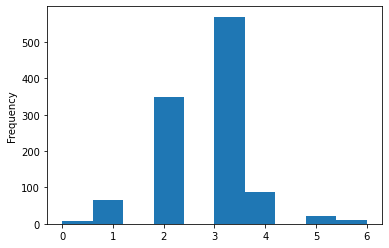

In [73]:

d.Months_Inactive_12_mon.plot(kind= "hist") #비활성화 2~3 개월이면 탈퇴할 가능성 높다 

<AxesSubplot:ylabel='Frequency'>

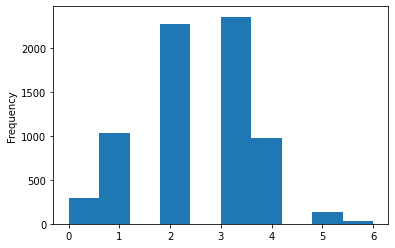

In [74]:

df.Contacts_Count_12_mon.plot(kind= "hist")

<AxesSubplot:ylabel='Frequency'>

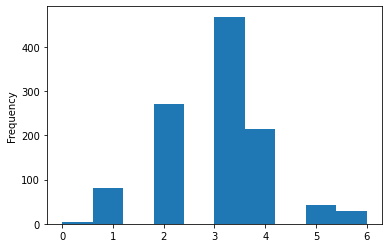

In [75]:

d.Contacts_Count_12_mon.plot(kind= "hist")


<AxesSubplot:ylabel='Frequency'>

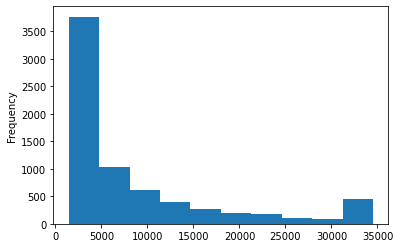

In [76]:
df.Credit_Limit.plot(kind= "hist")

<AxesSubplot:ylabel='Frequency'>

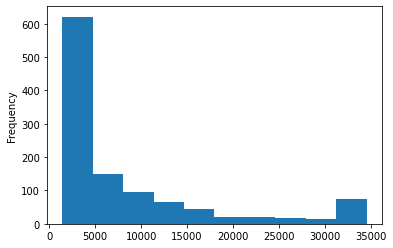

In [77]:
d.Credit_Limit.plot(kind= "hist")

<AxesSubplot:ylabel='Frequency'>

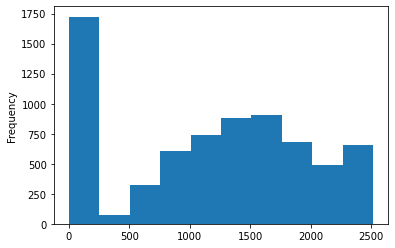

In [78]:

df.Total_Revolving_Bal.plot(kind= "hist")

<AxesSubplot:ylabel='Frequency'>

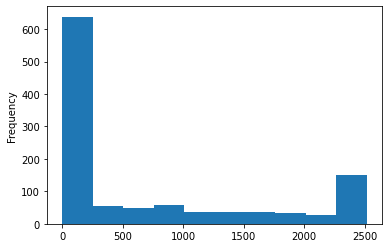

In [79]:


d.Total_Revolving_Bal.plot(kind= "hist") # 리볼빙을 사용하는 고객의 탈퇴율은 비교적 적어보인다. 


In [80]:
import seaborn as sns 

# df.columns

# ob_c = df.select_dtypes("object")

# sns.pairplot(df.drop(ob_c, axis =1))
# plt.show()

In [81]:
# ob_c = d.select_dtypes("object")

# sns.pairplot(d.drop(ob_c, axis =1))
# plt.show()

In [82]:
# 카드 등급 별 탈퇴 비율 비슷비슷 
# 카드 등급별 리볼빙 사용 비율 > 리볼빙을 이용안하는 고객중에서 탈퇴한경우가 많았다. 
# 카드사와 연결된 제품수가 많으면 탈퇴 가능성이 적어진다. 


<AxesSubplot:ylabel='Frequency'>

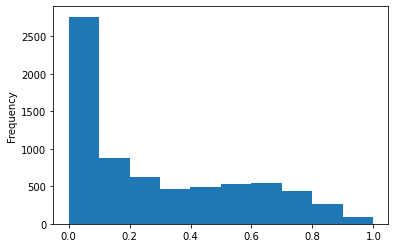

In [83]:

df.Avg_Utilization_Ratio.plot(kind= "hist")


<AxesSubplot:ylabel='Frequency'>

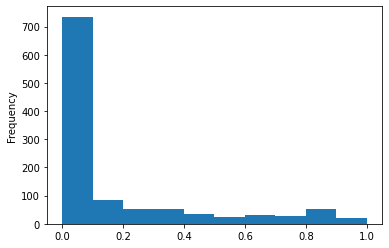

In [84]:
d.Avg_Utilization_Ratio.plot(kind= "hist")

In [85]:
from sklearn.model_selection import train_test_split
target = "Attrition_Flag"
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df[target], random_state=2)


In [86]:
train.shape , test.shape

((5664, 20), (1417, 20))

In [87]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)

In [88]:
train.shape, val.shape

((4531, 20), (1133, 20))

In [89]:
X_train = train.drop(columns = ["Attrition_Flag"])
y_train = train["Attrition_Flag"]


In [90]:
X_val = val.drop(columns = ["Attrition_Flag"])
y_val = val["Attrition_Flag"]

In [91]:
from category_encoders.target_encoder import TargetEncoder
t_enc = TargetEncoder(smoothing=1000.0, cols =["Gender","Marital_Status"], min_samples_leaf =1 )
df_encoded = t_enc.fit(X_train , y_train )
X_train_tenc = df_encoded.transform(X_train)

/Users/tjrksp/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."


In [92]:

#ordinal >> 맵핑 .. 
df_encoded

TargetEncoder(cols=['Gender', 'Marital_Status'], smoothing=1000.0)

In [93]:
df.Card_Category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [94]:
from category_encoders.ordinal import OrdinalEncoder
Or_enc = OrdinalEncoder( cols = ["Education_Level","Income_Category","Card_Category"] , 
                        mapping =  [{"col": "Education_Level", "mapping": {"Uneducated": 0,"High School" : 1, "College": 2,"Graduate" : 3, "Post-Graduate": 4, "Doctorate" : 5 }}, 
                                     {"col": "Income_Category","mapping": {"Less than $40K": 0,"$40K - $60K" : 1 , "$60K - $80K" : 2 ,"$80K - $120K": 3, "$120K +": 4}},
                                   {"col": "Card_Category","mapping" : {"Blue" : 0, "Silver": 1, "Gold" : 2, "Platinum": 3} }])
Or_enc.fit(X_train_tenc , y_train )
final_encoded = Or_enc.transform(X_train_tenc)



In [95]:
final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4531 entries, 1596 to 2878
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              4531 non-null   int64  
 1   Gender                    4531 non-null   float64
 2   Dependent_count           4531 non-null   int64  
 3   Education_Level           4531 non-null   int64  
 4   Marital_Status            4531 non-null   float64
 5   Income_Category           4531 non-null   int64  
 6   Card_Category             4531 non-null   int64  
 7   Months_on_book            4531 non-null   int64  
 8   Total_Relationship_Count  4531 non-null   int64  
 9   Months_Inactive_12_mon    4531 non-null   int64  
 10  Contacts_Count_12_mon     4531 non-null   int64  
 11  Credit_Limit              4531 non-null   float64
 12  Total_Revolving_Bal       4531 non-null   int64  
 13  Avg_Open_To_Buy           4531 non-null   float64
 14  Total

In [96]:
z = t_enc.transform(X_val)
X_val = Or_enc.transform(z)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
pipe = make_pipeline(
    t_enc,
    Or_enc,
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, class_weight ="balanced")
)
pipe.fit(final_encoded, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

검증 정확도:  0.9452780229479258
검증 정확도:  0.9452780229479258


In [98]:
df.Attrition_Flag.value_counts(normalize =True)  # 기준 모델 84 퍼센트  

0    0.842819
1    0.157181
Name: Attrition_Flag, dtype: float64

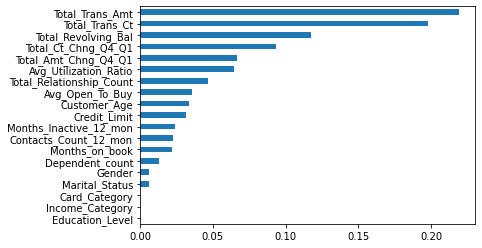

In [99]:
rf = pipe.named_steps['randomforestclassifier']
colnames = X_val.columns
importances = pd.Series(rf.feature_importances_, colnames)
importances.sort_values()[:].plot.barh();

In [100]:
# 오전 세션 보아님 조언 요약
# - 하이퍼파라미터 튜닝에 들어가기 전에 모델 여러 개 해보고 하나 선택한 후에 하이퍼파라미터 튜닝 시작하는 걸 추천 
# (여러 개 모델별로 다 하이퍼파라미팅 튜닝 시도하는 것도 가능할 수는 있지만 일단은 이 방법을 더 우선적으로 하시면 좋다는 의미)
# - 분류 문제 - 꼭 평가지표를 하나 정해서 그 값만으로 모델 성능을 비교하기 보다는 confusion matrix 전체를 다 비교해 보는 방식을 추천

/Users/tjrksp/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


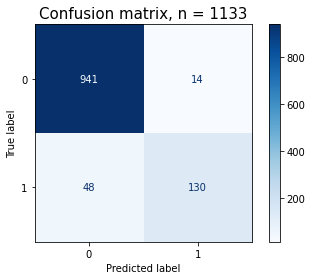

In [101]:
from sklearn.metrics import plot_confusion_matrix


fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [102]:
cm = pcm.confusion_matrix
# 총맞춘수/전체  = 정확도 accuracy
import numpy as np 
np.diag(cm).sum()/cm.sum()   

0.9452780229479258

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       955
           1       0.90      0.73      0.81       178

    accuracy                           0.95      1133
   macro avg       0.93      0.86      0.89      1133
weighted avg       0.94      0.95      0.94      1133



<AxesSubplot:ylabel='Count'>

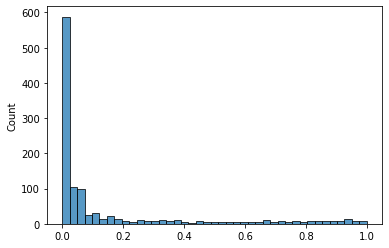

In [104]:
pipe.classes_
pipe.predict(X_val)
y_pred_proba = pipe.predict_proba(X_val)[:,1] # 탈퇴할 확률 
sns.histplot(y_pred_proba)


In [105]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred)  
print(y_pred)
print(auc_score)


auc_score = roc_auc_score(y_val, y_pred_proba)
print(y_pred_proba)
print(auc_score)

[0 0 0 ... 0 0 0]
0.8578386963939055
[0.02 0.   0.05 ... 0.   0.07 0.02]
0.9839872933701983


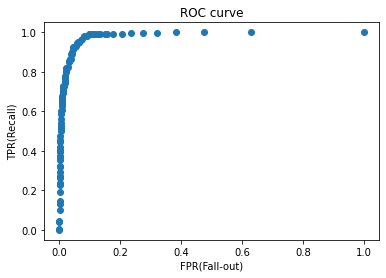

In [106]:
from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [107]:
optimal_idx = np.argmax(tpr - fpr)


result_t = thresholds[optimal_idx]
result_t

0.18

In [108]:
y_pred_optimal = y_pred_proba >= 0.18
print(classification_report(y_val, y_pred_optimal)) # 최적의 임계값으로 분류평가 recall 은 상당히 상승 정밀도0.2 하락 f1 0.01하락

# 이문제는 정밀도가 더 중요할까 재현율이 더 중요할까 ? 
# 재현율이 더 중요하다고 생각 왜냐하면  탈퇴가능성이 높은 회원인데 아니라고 판단했을 경우 회원을 잃을 수 있다. 
# 반대로 정밀도는 일반사용자를 탈퇴가능성이 높다고 판단하는 경우인데 이경우는 마케팅비용의 분산 위험이 있다. 
# 내가 생각했을 떄 회원을 잃는 것이 더 크리티컬 하다고 생각한다. 
# 그러므로 최적의 임계값으로 설정하고 모델을 만든다.! 


              precision    recall  f1-score   support

           0       1.00      0.92      0.96       955
           1       0.69      0.98      0.81       178

    accuracy                           0.93      1133
   macro avg       0.85      0.95      0.89      1133
weighted avg       0.95      0.93      0.93      1133



In [109]:
auc_score = roc_auc_score(y_val, y_pred_proba)
print(y_pred_proba)
print(auc_score)

[0.02 0.   0.05 ... 0.   0.07 0.02]
0.9839872933701983


In [110]:
X_test = test.drop(columns = ["Attrition_Flag"])
y_test = test["Attrition_Flag"]

xx = df_encoded.transform(X_test)

result = Or_enc.transform(xx)

print('검증 정확도: ', pipe.score(result, y_test))
y_pred = pipe.predict(result)

검증 정확도:  0.9477769936485533


In [111]:
print(classification_report(y_test, y_pred))

#하이퍼파라미터 조정전 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1194
           1       0.95      0.70      0.81       223

    accuracy                           0.95      1417
   macro avg       0.95      0.85      0.89      1417
weighted avg       0.95      0.95      0.94      1417



In [112]:
pip install -U matplotlib

Note: you may need to restart the kernel to use updated packages.


In [113]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform
dists = {
    
    'randomforestclassifier__n_estimators': randint(50, 500), 
    "randomforestclassifier__min_samples_split": [25,50,100,200,500],
    'randomforestclassifier__max_features': uniform(0, 1), # max_features
    "randomforestclassifier__max_leaf_nodes" : [5,10,15,20,30]
}
clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='f1',  
    verbose=1,
    n_jobs=4
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/tjrksp/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/Users/tjrksp/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."


In [114]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('f1: ', clf.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__max_features': 0.9720151649850353, 'randomforestclassifier__max_leaf_nodes': 30, 'randomforestclassifier__min_samples_split': 25, 'randomforestclassifier__n_estimators': 329}
f1:  0.8235782889344003


In [115]:
pipe = clf.best_estimator_ # best model 



In [116]:
print('검증 정확도: ', pipe.score(X_test, y_test))
y_pred = pipe.predict(result)
print(classification_report(y_test, y_pred))

# feature importance 만으로는 타겟에 어느정도 영항을 미쳤는지 알 수 없다. 
# shap , pdp 실시 . 

검증 정확도:  0.9322512350035286
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1194
           1       0.74      0.88      0.80       223

    accuracy                           0.93      1417
   macro avg       0.86      0.91      0.88      1417
weighted avg       0.94      0.93      0.93      1417



In [117]:
rf = pipe.named_steps['randomforestclassifier']
X_val

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3693,42,0.144299,4,0,0.151441,2,0,36,5,3,3,2966.0,2371,595.0,0.969,4416,83,0.844,0.799
1347,53,0.144299,1,3,0.151441,3,0,36,5,2,2,11329.0,1180,10149.0,0.648,1213,33,0.571,0.104
4384,40,0.171407,2,3,0.151441,0,0,35,3,1,3,3511.0,0,3511.0,0.758,5238,82,0.708,0.000
3042,50,0.171407,3,5,0.162495,0,0,39,6,1,3,9966.0,0,9966.0,0.966,4401,60,1.069,0.000
4607,50,0.171407,3,5,0.151441,0,0,41,3,3,2,2372.0,1148,1224.0,0.872,4418,80,0.818,0.484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,38,0.171407,3,1,0.151441,0,0,27,4,3,3,1438.3,0,1438.3,0.730,2478,45,0.552,0.000
983,48,0.144299,3,3,0.151441,1,0,30,3,1,3,3235.0,2517,718.0,1.091,1637,43,0.870,0.778
3138,46,0.144299,1,1,0.162495,1,0,33,6,4,3,1664.0,798,866.0,0.703,4804,66,0.535,0.480
3400,35,0.171407,4,3,0.162495,0,0,22,6,3,3,1438.3,0,1438.3,0.512,3427,64,0.829,0.000


In [118]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Total_Amt_Chng_Q4_Q1'

isolated = pdp_isolate(
    model=rf, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': <AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1'>})

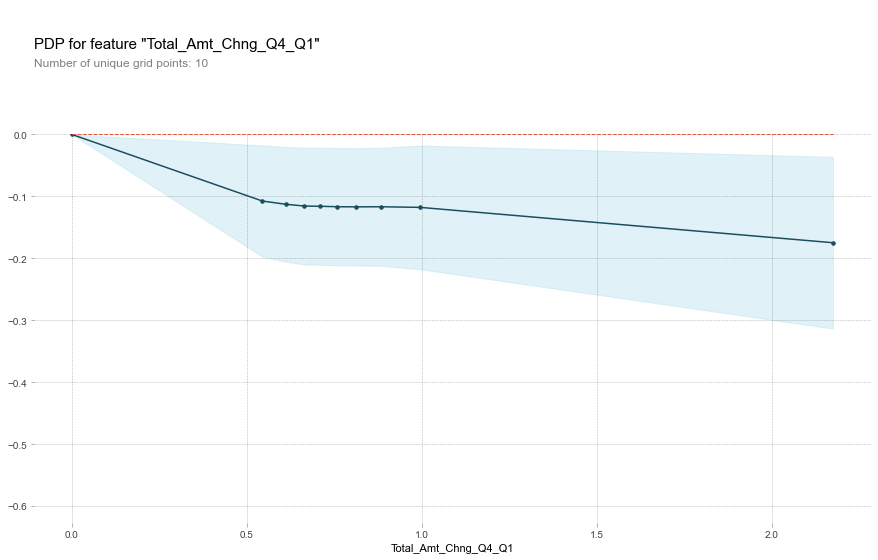

In [119]:
pdp_plot(isolated, feature_name=feature)


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='Customer_Age'>})

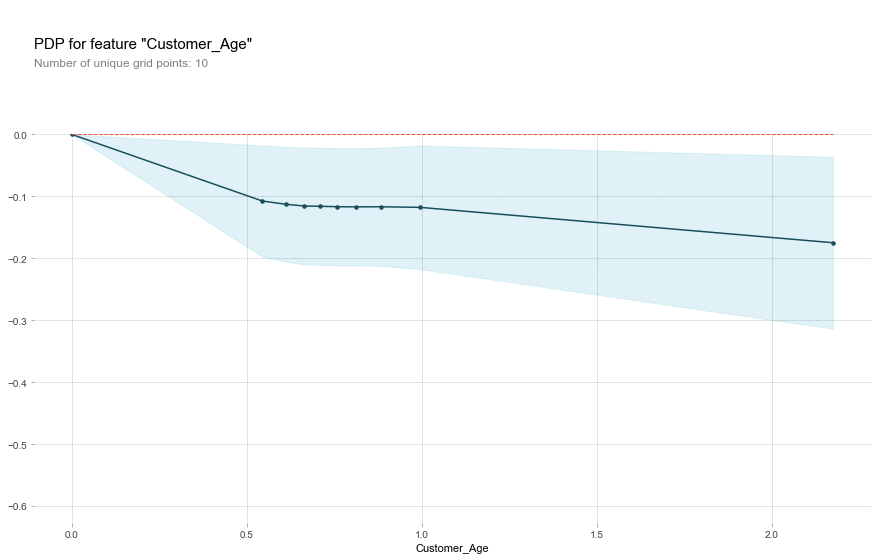

In [120]:

pdp_plot(isolated, feature_name="Customer_Age")

In [121]:
X_val
y_val.value_counts() # 1이 탈퇴자 

0    955
1    178
Name: Attrition_Flag, dtype: int64

In [122]:
X_test = pipe.named_steps["ordinalencoder"].transform(X_test)
X_test = pipe.named_steps["targetencoder"].transform(X_test)
X_test

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
786,28,0.144299,0,3,0.151441,0,0,18,5,1,3,2943.0,1789,1154.0,1.271,2591,55,0.897,0.608
3878,45,0.171407,2,3,0.151441,0,0,36,6,1,3,4202.0,2201,2001.0,0.714,4385,78,0.660,0.524
5063,38,0.171407,2,1,0.162495,0,0,33,3,3,3,1568.0,0,1568.0,0.611,2812,59,0.788,0.000
1899,35,0.144299,2,3,0.162495,4,0,27,6,2,2,13655.0,1048,12607.0,0.509,2383,59,0.595,0.077
2199,48,0.144299,3,3,0.151441,2,0,38,5,2,3,16920.0,2157,14763.0,0.629,3275,60,0.500,0.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,52,0.171407,5,1,0.162495,0,1,36,3,2,2,11280.0,1523,9757.0,0.765,16237,128,0.753,0.135
3457,43,0.171407,3,1,0.151441,0,1,31,3,3,4,13608.0,1190,12418.0,0.553,3118,76,0.767,0.087
3884,46,0.171407,3,3,0.161866,0,0,34,4,2,4,9863.0,686,9177.0,0.581,3068,58,0.933,0.070
2563,50,0.144299,1,5,0.161866,2,0,33,3,5,2,19939.0,0,19939.0,1.030,3342,76,0.462,0.000


In [123]:
row = X_test.iloc[[1]]
row

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3878,45,0.171407,2,3,0.151441,0,0,36,6,1,3,4202.0,2201,2001.0,0.714,4385,78,0.66,0.524


In [124]:
row  = X_test.iloc[[]]


In [125]:
y_test

786     0
3878    0
5063    1
1899    0
2199    0
       ..
6861    0
3457    0
3884    0
2563    0
4858    0
Name: Attrition_Flag, Length: 1417, dtype: int64

In [126]:
import shap
row

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [127]:

row  = X_test.loc[[5063]]
explainer = shap.TreeExplainer(rf)

# processor = make_pipeline(
#     t_enc,
#     Or_enc,
# )

# row_processed = processor.transform(X_test[[1]])
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1], 
    shap_values=shap_values[1], 
    features=row, 
    link='identity' # SHAP value를 확률로 변환해 표시합니다.
)
# shap.force_plot(explainer.expected_value[0],X.iloc[0,:])


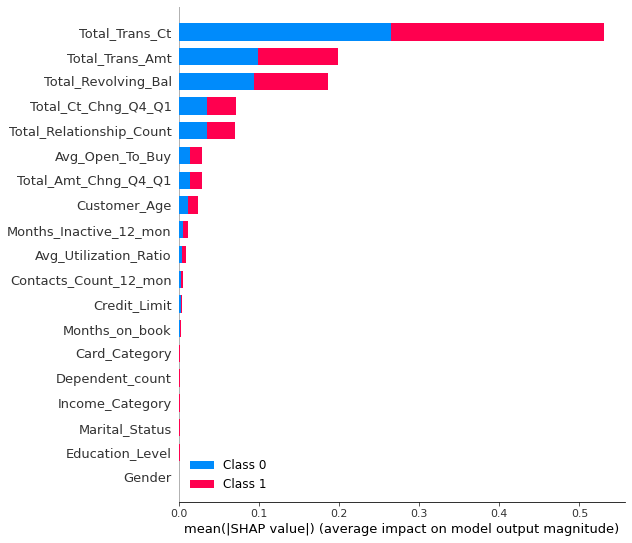

In [128]:
shap_values = explainer.shap_values(X_test.iloc[:100])
shap.summary_plot(shap_values, X_test.iloc[:100], plot_type= "bar")

###  # predict_proba 에서 예측확률이 높다고 무조건 참인건 아님 거짓도 있을수 있음.!!
#### TP,TN,FP,FN 생각! 

In [129]:
rf.classes_ # 0 일반 1 탈퇴 
# y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
rf.predict_proba(X_test)[:, 1]  # 탈퇴자일 확률 

X_test_p = X_test.copy()

newdf = pd.DataFrame({"proba": rf.predict_proba(X_test)[:, 1], "real": y_test.values })

X_test_p.reset_index(drop =True, inplace =True)
newdf = pd.concat([newdf,X_test_p], axis=1,ignore_index =True)

col = ["proba","real",'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
newdf.columns = col
newdf = newdf[(newdf["real"]==1) &(newdf["proba"]>0.5) ]
newdf



,proba,real,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
15,0.953834,1,53,0.171407,1,1,0.151441,1,0,44,...,3,3,1816.0,0,1816.0,0.884,2474,44,0.692,0.000
35,0.800822,1,37,0.171407,2,3,0.161866,0,0,30,...,3,4,3328.0,2517,811.0,0.553,2196,47,0.621,0.756
37,0.928413,1,50,0.171407,3,1,0.151441,0,0,40,...,2,4,2897.0,1506,1391.0,0.618,2214,46,0.484,0.520
42,0.953112,1,53,0.144299,2,1,0.151441,4,0,46,...,3,1,7474.0,0,7474.0,0.858,732,21,0.615,0.000
43,0.931982,1,48,0.144299,3,1,0.151441,3,0,42,...,1,3,9959.0,0,9959.0,0.688,805,24,0.143,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,0.871912,1,60,0.171407,2,1,0.162495,0,0,54,...,6,2,8141.0,1811,6330.0,1.043,5043,53,0.432,0.222
1384,0.874642,1,38,0.144299,3,2,0.151441,2,0,36,...,2,2,6114.0,1461,4653.0,0.772,2608,36,0.385,0.239
1400,0.961672,1,51,0.171407,4,4,0.151441,1,1,43,...,3,3,3735.0,0,3735.0,0.762,6826,61,0.848,0.000
1403,0.923916,1,44,0.171407,3,5,0.151441,0,0,38,...,1,3,7222.0,0,7222.0,0.685,920,18,0.500,0.000


In [133]:
newd = newdf.iloc[:,2:]
row = newd.loc[[1400]]
                
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(row)   #shap value 2개  classes_  0,1 에 대한 shap value인가? 

explainer.expected_value # 이것도 두개 
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1], 
    shap_values=shap_values[1], 
    features=row
    # SHAP value를 확률로 변환해 표시합니다.
)

## shap 확률하고 model.predict_proba 확률이 다름 렉처노트는 같은데 ....  달라도 상관없나 ? 내일 케글 타이타닉 예시로 다시 시도 